___
# <font color= #d4b1e6> **Laboratorio de Modelado de Datos** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Diana Denise Valdivia Vargas 752959, Priscila Cervantes Ramírez 750722 & Mónica Ibarra 750601` </font>
- <Strong> Fecha:  </Strong>  <font color="blue">`25 de octubre 2024` </font>
___


## <font color= #c9d996> **Estimación de los niveles de obesidad basada en los hábitos alimenticios y la condición física**</font>

#### <font color= #96d9cf> **Definición del Problema**</font>

Este conjunto de datos incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, los cuales están etiquetados con la variable de clase NObesity (Nivel de Obesidad). Esta variable permite clasificar los datos en las categorías de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III.

Descripción de Variables

- **Género**: El género del individuo.
- **Edad**: La edad del individuo, medida en años.
- **Altura**: La altura del individuo, medida en metros.
- **Peso**: El peso del individuo, medido en kilogramos.
- **historia_familiar_con_sobrepeso**: Indica si el individuo tiene un familiar que ha sufrido o sufre de sobrepeso 
- **FAVC**: Indica si el individuo consume alimentos altos en calorías con frecuencia 
- **FCVC**: Frecuencia con la que el individuo consume verduras en sus comidas.
- **NCP**: El número de comidas principales que el individuo tiene diariamente.
- **CAEC**: Indica si el individuo come algún alimento entre las comidas
- **FUMO**: Indica si el individuo fuma 
- **CH2O**: La cantidad de agua que el individuo bebe diariamente, medida en litros.
- **SCC**: Indica si el individuo monitorea su ingesta calórica diaria 
- **FAF**: Frecuencia de actividad física por semana, medida en horas.
- **TUE**: Tiempo que el individuo pasa usando dispositivos tecnológicos como teléfonos móviles, videojuegos, televisión, etc., medido en horas.
- **CALC**: Indica con qué frecuencia el individuo consume alcohol 
- **MTRANS**: El tipo de transporte que el individuo utiliza generalmente
- **NObeyesdad**: La variable objetivo que indica el nivel de obesidad del individuo

#### <font color= #96d9cf> **Explorar el conjunto de datos**</font>

In [2]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.metrics import Recall
from keras.optimizers import Adam
import tensorflow as tf
import random

In [80]:
# Leer el conjunto de datos
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [81]:
#Hacer una breve visualización de como se ve nuestro dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Cuántos datos tenemos
df.shape

(2111, 17)

El conjunto de datos cuenta con 2111 instancias y 17 variables _['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','CALC', 'MTRANS', 'NObeyesdad']_ de las cuáles nuestra target es **'NObeyesdad'**. El problema es de clasifiación sin embargo en nuestra variable target habrá que transformar las categorías a numeros, es decir, cada clase representa un número diferente. 

#### <font color= #96d9cf>**Características de la base de datos [Datos nulos, atípicos, distribución, etc]**</font>

Primero comprobemos que tipo de datos acepta cada variable y si tiene valores nulos

In [5]:
pd.DataFrame({'Tipo de Valores': df.dtypes,'Tiene Nulos': df.isnull().sum()})

,Tipo de Valores,Tiene Nulos
Gender,object,0
Age,float64,0
Height,float64,0
Weight,float64,0
family_history_with_overweight,object,0
FAVC,object,0
FCVC,float64,0
NCP,float64,0
CAEC,object,0
SMOKE,object,0


Ninguna variable tiene valores nulos sin embargo de las 17 features que tenemos, solo 8 son numéricas, el resto son categóricas por lo que habrá que tratarlas luego en el pre-procesamiento ya sea con un One-hot encoder o con Ordinal-encoder [dependiendo de si hay una jerarquía o no]

Veamos la distribución y la simetría que tienen nuestras variables numéricas para decidir si hay que tratarlas o no

In [74]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


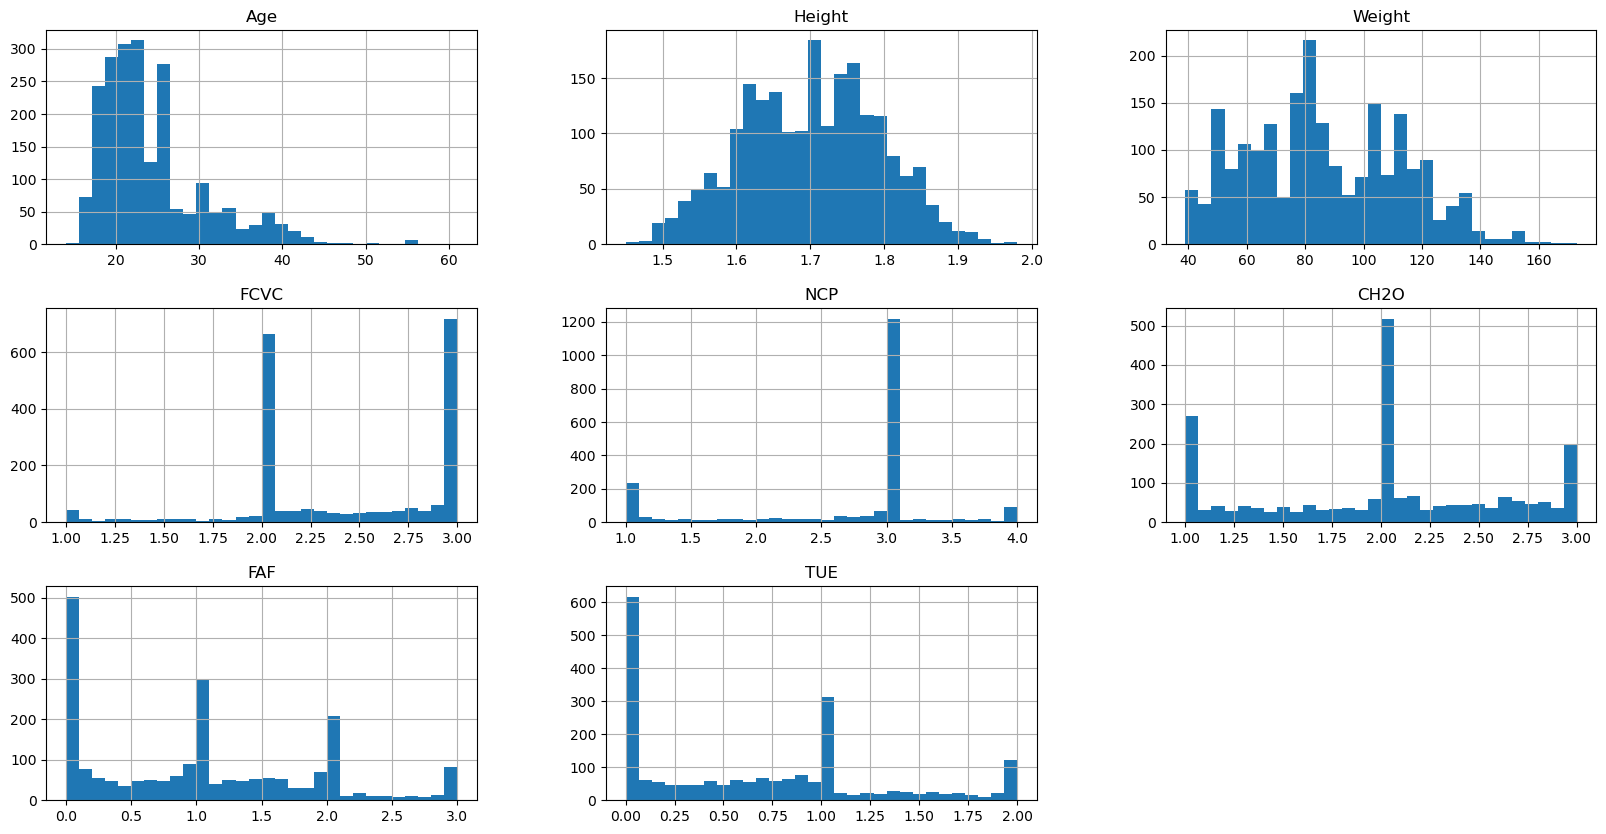

In [6]:
#¿Cómo observar la asimetría de lso datos? --> Histogramas
df.hist(bins=30,figsize=(20,10))
plt.show()

A simple vista podemos ver que la columna de edad **['Age']** tiene una asimetría positiva muy alta, mientras que las variables de altura **['Height']** y peso **['Weight']** estan distribuidas de forma simétrica, es decir que cumplen con una distribución de campana. El resto de las columnas es un poco más difícil de interpretar con el ojo, así que usaremos una función para que nos indique la asimetría de estas.

In [7]:
# Modificamos el código de la maestra para que solo seleccione las columnas que acepten valores numéricos y no categóricos
col_numericas = df.select_dtypes(include=['float', 'int']).columns

#Calcular el sesgo y asimetría
skewness = round(df[col_numericas].skew(), 2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"})

def f(x):
    if x['value'] < -1 or x['value'] > 1:
        return 'Highly Skewed'
    elif (x['value'] <= 0 and x['value'] >= -0.5) or (x['value'] >= 0 and x['value'] <= 0.5):
        return 'Symmetric distribution'
    else:
        return 'Moderately skewed'

# Crear una columna que indique el nivel se asimetría de las columnas
skewness['skewness'] = skewness.apply(f, axis=1)
skewness

,value,skewness
Age,1.53,Highly Skewed
Height,-0.01,Symmetric distribution
Weight,0.26,Symmetric distribution
FCVC,-0.43,Symmetric distribution
NCP,-1.11,Highly Skewed
CH2O,-0.10,Symmetric distribution
FAF,0.50,Symmetric distribution
TUE,0.62,Moderately skewed


<Axes: >

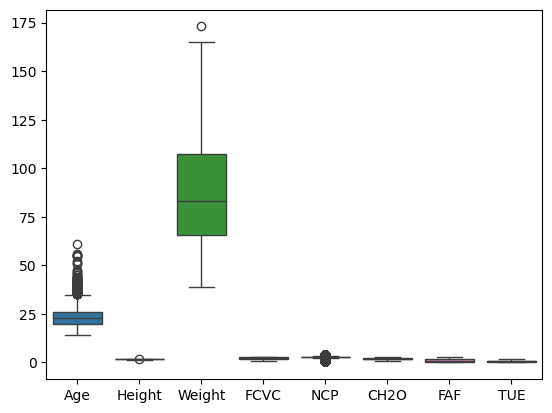

In [77]:
# Veamos los valores atípicos de forma gráfica
sns.boxplot(df)

Con el código, comprobamos que la variable **Edad** está considerablemente sesgada hacia la derecha, al igual que la variable **NCP** (número de comidas principales que el individuo consume diariamente). Esto es razonable, ya que es poco probable que todos los individuos entrevistados tengan la misma edad, a menos que la encuesta se haya realizado en una población demográfica muy específica. Por ejemplo, si la encuesta hubiera sido aplicada exclusivamente a personas de la tercera edad, es posible que la variable de edad presentara una distribución más equilibrada. De manera similar, dado que cada persona puede tener un número distinto de comidas diarias—ya sea por razones de dieta, mayor consumo de calorías, u otros motivos—es poco probable que esta variable tenga una distribución completamente simétrica.

También se puede apreciar que la columna de Estatura **['Height']** y Peso **['Weight']** tienen algunos atípicos que si bien no afectan la simetría, hay que ver si no se tratan de errores para que luego no afecten el escalamiento de las variables.

In [78]:
# Lo haremos con el método de el rango intercuartílico la variable es la Estatura
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar las filas donde hay valores atípicos
outliers = df[(df['Height'] < Q1 - 1.5 * IQR) | (df['Height'] > Q3 + 1.5 * IQR)]
outliers


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
349,Male,20.0,1.98,125.0,yes,yes,2.0,3.0,Always,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I


In [79]:
# ver que tan lejos esta del dato más alto que si se encuentra dentro del rango permitido
df_estatura = df.sort_values(by='Height', ascending=False)
df_estatura.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
349,Male,20.000000,1.980000,125.000000,yes,yes,2.0,3.0,Always,no,3.0,no,1.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_I
1350,Male,20.491475,1.975663,120.702935,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.767013,1.0,Sometimes,Public_Transportation,Obesity_Type_I


In [80]:
# Lo haremos con el método de el rango intercuartílico la variable es el Peso
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar las filas donde hay valores atípicos
outliers = df[(df['Weight'] < Q1 - 1.5 * IQR) | (df['Weight'] > Q3 + 1.5 * IQR)]
outliers


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [81]:
# ver cuál es el límite superior para determinar valores atípicos y ver por cuánto es que lo excede
Q3 + 1.5 * IQR

170.3666905

Al analizar los outliers en el caso de la estatura, es cierto que es poco común que alguien en México, Perú o Colombia mida casi 2 metros, pero no es imposible. Además, la segunda entrada con el valor más alto es solo un centímetro más baja, por lo que mantener este dato no afectará significativamente nuestro escalamiento.

En cuanto al peso, ocurre algo similar: el outlier se encuentra fuera del rango por solo 3 kilogramos, lo que no impactará de manera notable nuestro escalamiento. Este valor no es un error, ya que, a pesar de ser considerablemente alto, al examinar las otras variables y ver que se clasifica como el tipo de obesidad más grave, tiene sentido en el contexto.

Para tratar los datos atípicos y la asimetría se probaran dos conceptos: El primero es aplicar transformaciones para mejorar la asimetría: **Logarítmica** a la variable Edad ya que contiene solo valores positivos y tiene un efecto moderado en distribuciones con sesgos positivos y una transformación **Elevada al cuadrado**  en la variable NCP ya que tienen un sesgo alto negativo y tiene un efecto moderado.

El segundo es dejar el dataset así como está y mejor optar por utilizar un modelo robusto con outliers.

In [8]:
# SAplicar la transformación a una copia del dataset
df_transformado=df.copy()
#Logarítmica
df_transformado['Age'] = np.log(df_transformado['Age'])
df_transformado['NCP'] = df_transformado['NCP'] ** 2

In [9]:
# Comprobar que si ayuda a mejorar la asimetría.
skewness = round(df_transformado[['Age', 'NCP']].skew(), 2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"})

def f(x):
    if x['value'] < -1 or x['value'] > 1:
        return 'Highly Skewed'
    elif (x['value'] <= 0 and x['value'] >= -0.5) or (x['value'] >= 0 and x['value'] <= 0.5):
        return 'Symmetric distribution'
    else:
        return 'Moderately skewed'

# Crear una columna que indique el nivel se asimetría de las columnas
skewness['skewness'] = skewness.apply(f, axis=1)
skewness

,value,skewness
Age,0.87,Moderately skewed
NCP,-0.41,Symmetric distribution


#### <font color= #96d9cf>**Análisis del comportamiento de los datos**</font>

Veamos como se ve la sitribución de nuestra variable de salida

In [10]:
#cómo se ve la distribución de nuestra variable de salida
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

C:\Users\diana\AppData\Local\Temp\ipykernel_8100\596760383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=df, palette='dark:#5A9_r')


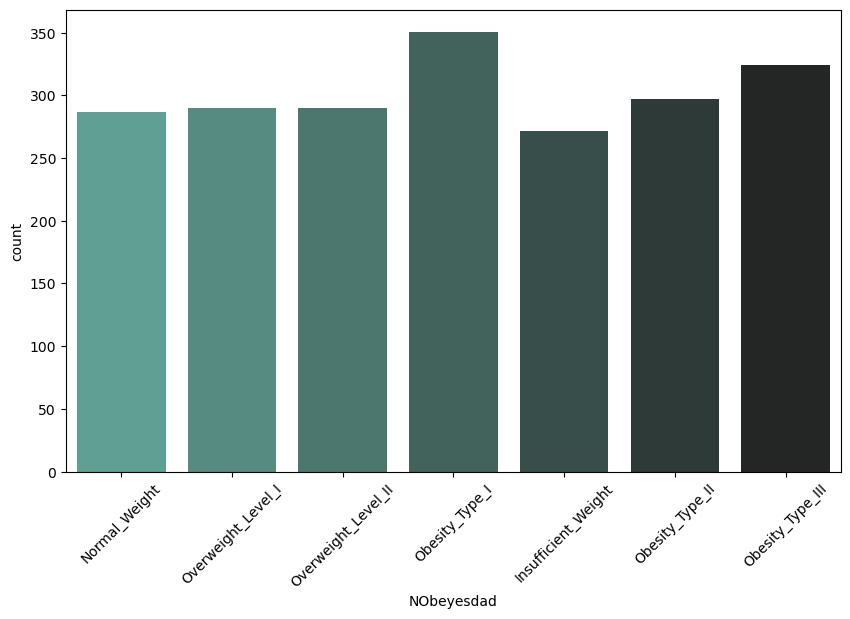

In [7]:
#graficando la distribucion de la variable a predecir
plt.figure(figsize=(10, 6))  
sns.countplot(x='NObeyesdad', data=df, palette='dark:#5A9_r')
plt.xticks(rotation=45)
plt.show()

La diferencia entre la clase mayoritaria y minoritaria es bastante pequeña, de 79, por lo que los datos estan bastante bien balanceados, y no es necesario usar una herramienta como SMOTE.

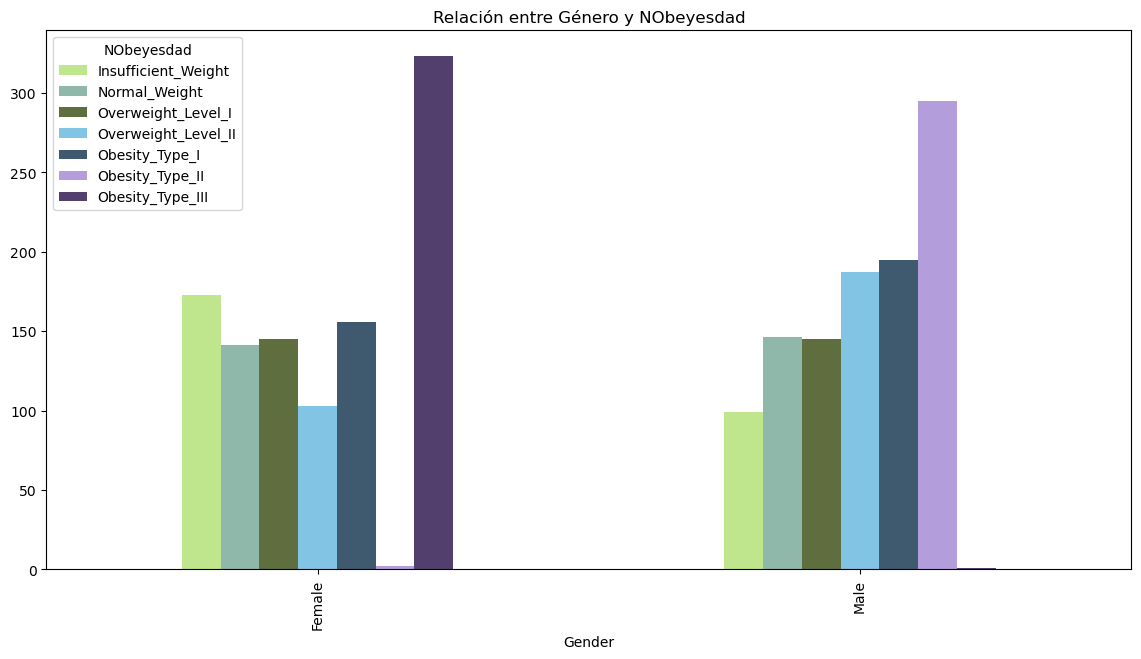

In [86]:
# Esto es estético, pero acomodar las etiquetas de forma que vayan de menor BMI a mayor BMI
orden = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Comparar la clase de BMI son el género de los entrevistados
crosstab = pd.crosstab(df['Gender'], df['NObeyesdad']).reindex(columns=orden)
crosstab.plot(kind='bar', figsize=(14, 7), color=['#bfe68c', '#8fb8ab', '#5e6e3f', '#82c4e3', '#3f596e', '#b39ddb', '#533f6e'])
plt.title('Relación entre Género y NObeyesdad')
plt.show()

Como se puede observar en el gráfico, es poco probable que una mujer sea clasificada como afectada por obesidad tipo 2, mientras que en los hombres esta categoría es la más frecuente. Esta diferencia se debe a la forma en que cada género almacena la grasa en el cuerpo. Las mujeres tienden a almacenar la grasa de manera subcutánea, es decir, debajo de la piel, especialmente en áreas como las caderas y los muslos. En contraste, los hombres suelen acumular grasa de forma visceral, que se localiza en la región abdominal. Esto explica por qué los hombres presentan un cuerpo en forma de "manzana", mientras que las mujeres suelen tener una figura de "pera".

Debido a esta diferencia en la distribución de la grasa, la obesidad tipo 2 está más asociada con problemas metabólicos. Por lo tanto, los hombres, al almacenar grasa en el área abdominal, son más propensos a ser catalogados como obesos tipo 2. Sin embargo, esto no significa que las mujeres sean una excepción; simplemente es una conjetura sobre por qué hay tan pocas mujeres clasificadas en esta categoría.

Como almacenan la grasa ambos géneros --> https://www.erchonia.com/how-men-and-women-store-fat-differently/

Relacion de la grasa visceral con la obesidad tipo 2 -> https://pmc.ncbi.nlm.nih.gov/articles/PMC11013274/#:~:text=Type%202%20diabetes%20(T2D)%20is,regardless%20of%20individual%20body%20mass.

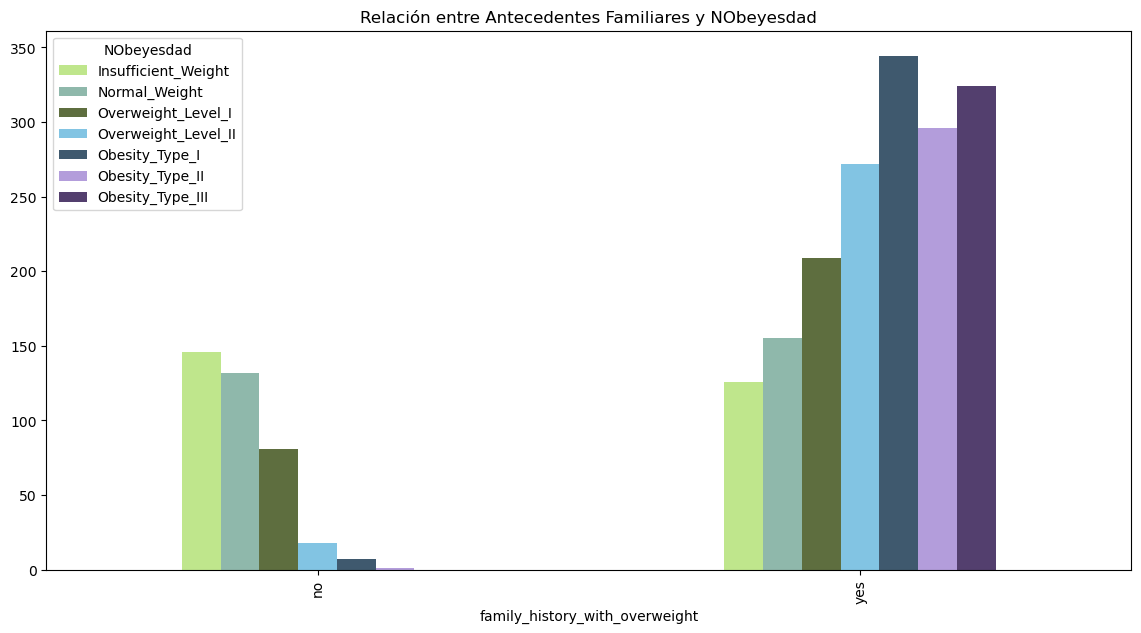

In [87]:
# Esto es estético, pero acomodar las etiquetas de forma que vayan de menor BMI a mayor BMI
orden = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Comparar la clase con los antecedentes familiares de los individuos
crosstab = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad']).reindex(columns=orden)
crosstab.plot(kind='bar', figsize=(14, 7), color=['#bfe68c', '#8fb8ab', '#5e6e3f', '#82c4e3', '#3f596e', '#b39ddb', '#533f6e'])
plt.title('Relación entre Antecedentes Familiares y NObeyesdad')
plt.show()

Según un artículo escolar, la herencia familiar, en su aspecto biológico o carga genética, se ha identificado como uno de los factores de riesgo predictores para la diabetes mellitus, la obesidad, la enfermedad cardiovascular y la hipertensión arterial, con un 50% de carácter hereditario. Además, se estima que hay un 30% de probabilidades de llegar a ser obeso si se cuentan con antecedentes familiares. Debido a lo anterior, tiene sentido que la mayoría de las personas clasificadas con obesidad de cualquier tipo sean aquellas que presentan estos antecedentes.

Artículo -> https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-74592023000300489&lang=pt 

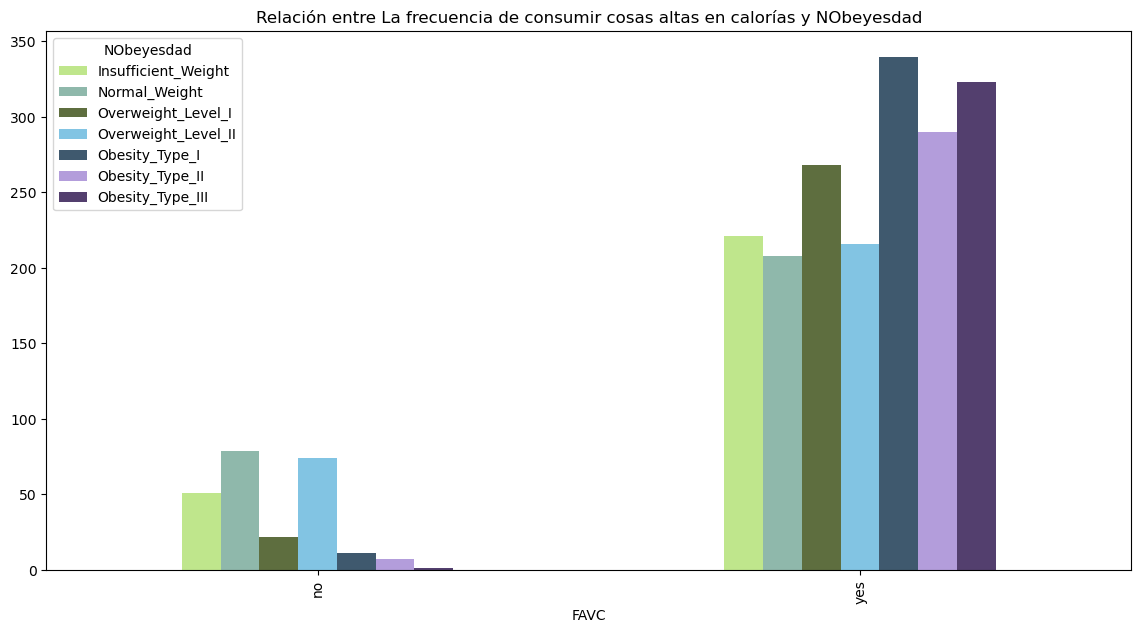

In [88]:
# Esto es estético, pero acomodar las etiquetas de forma que vayan de menor BMI a mayor BMI
orden = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Comparar la clase con el consumo de alimentos altos en calorías
crosstab = pd.crosstab(df['FAVC'], df['NObeyesdad']).reindex(columns=orden)
crosstab.plot(kind='bar', figsize=(14, 7), color=['#bfe68c', '#8fb8ab', '#5e6e3f', '#82c4e3', '#3f596e', '#b39ddb', '#533f6e'])
plt.title('Relación entre La frecuencia de consumir cosas altas en calorías y NObeyesdad')
plt.show()

Según una nota de la OMS, una de las causas de la obesidad se atribuye a un desequilibrio energético entre las calorías consumidas y las gastadas, resultado del aumento en el consumo de alimentos hipercalóricos, ricos en grasas, sal y azúcares, pero bajos en vitaminas, minerales y otros micronutrientes. En el gráfico se evidencia que un alto consumo de calorías, si no se gastan, puede contribuir al desarrollo de la obesidad.

Nota -> https://www.gob.mx/profeco/documentos/muchos-deseos-y-pocas-calorias-obesidad-y-sobrepeso?state=published

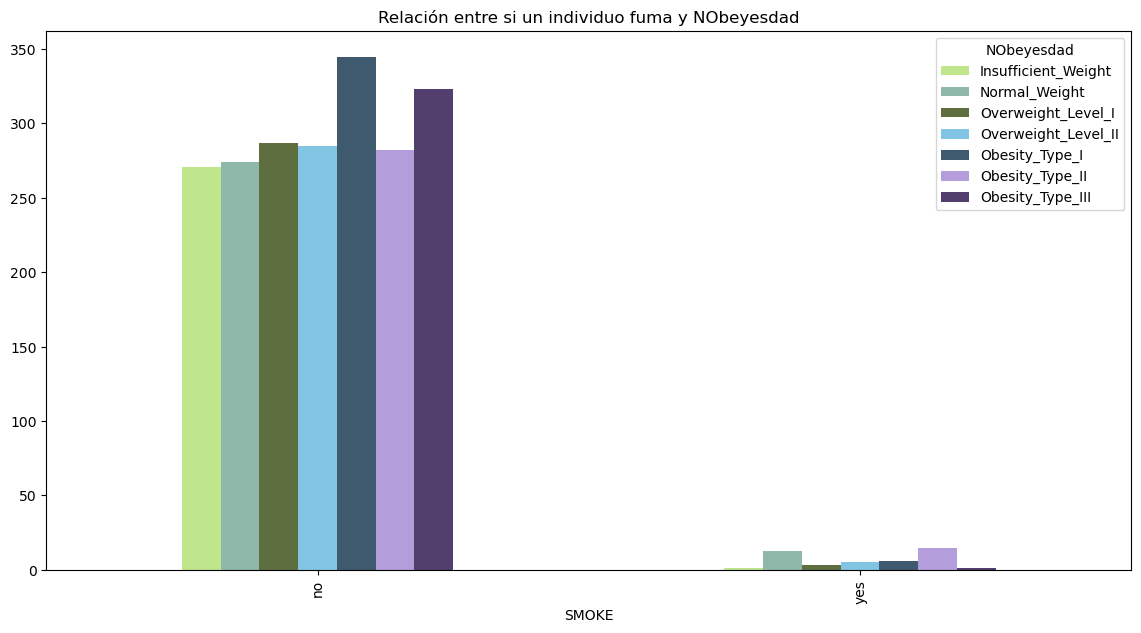

In [89]:
# Esto es estético, pero acomodar las etiquetas de forma que vayan de menor BMI a mayor BMI
orden = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Comparar la clase con si son fumadores o no
crosstab = pd.crosstab(df['SMOKE'], df['NObeyesdad']).reindex(columns=orden)
crosstab.plot(kind='bar', figsize=(14, 7), color=['#bfe68c', '#8fb8ab', '#5e6e3f', '#82c4e3', '#3f596e', '#b39ddb', '#533f6e'])
plt.title('Relación entre si un individuo fuma y NObeyesdad')
plt.show()

El conjunto de datos no aclara si aquellos que no fuman son personas que nunca han fumado o si son fumadores frecuentes que han dejado de hacerlo. Si asumimos que se trata de personas que han dejado de fumar, esto podría explicar por qué la mayoría de los datos relacionados con las categorías de obesidad y sobrepeso se concentran en quienes no fuman. Aunque el consumo de tabaco se ha asociado con un bajo índice de masa corporal (IMC), las tasas de obesidad son mayores entre los fumadores. Se estima que entre el 35% y el 65% de los fumadores que buscan tratamiento para dejar de fumar presentan sobrepeso u obesidad.

Distintos estudios han demostrado que el 80% de los fumadores aumenta entre 3.6 kg y 7.3 kg de peso, e incluso un 13% puede ganar hasta 10 kg después de cesar el tabaco. 

Artículo escolar -> https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0717-73482017000300249#:~:text=Si%20bien%20el%20consumo%20de,sobrepeso%20u%20obesidad1%2C2.


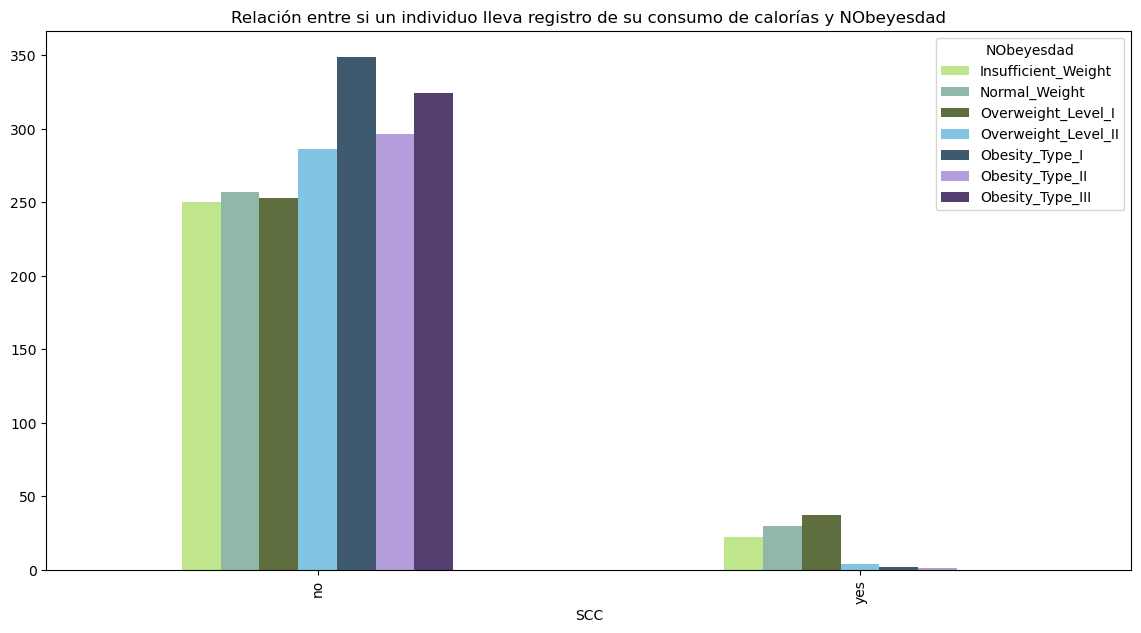

In [90]:
# Esto es estético, pero acomodar las etiquetas de forma que vayan de menor BMI a mayor BMI
orden = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Comparar la clase con si son fumadores o no
crosstab = pd.crosstab(df['SCC'], df['NObeyesdad']).reindex(columns=orden)
crosstab.plot(kind='bar', figsize=(14, 7), color=['#bfe68c', '#8fb8ab', '#5e6e3f', '#82c4e3', '#3f596e', '#b39ddb', '#533f6e'])
plt.title('Relación entre si un individuo lleva registro de su consumo de calorías y NObeyesdad')
plt.show()

Aunque llevar un registro de las calorías que consumes puede ayudarte a tener un control de tu alimentación y a identificar hábitos que necesitas mejorar, el no hacerlo no necesariamente te expone al riesgo de padecer sobrepeso. Según el gráfico, incluso las personas que no mantienen un registro pueden llegar a presentar bajo peso.

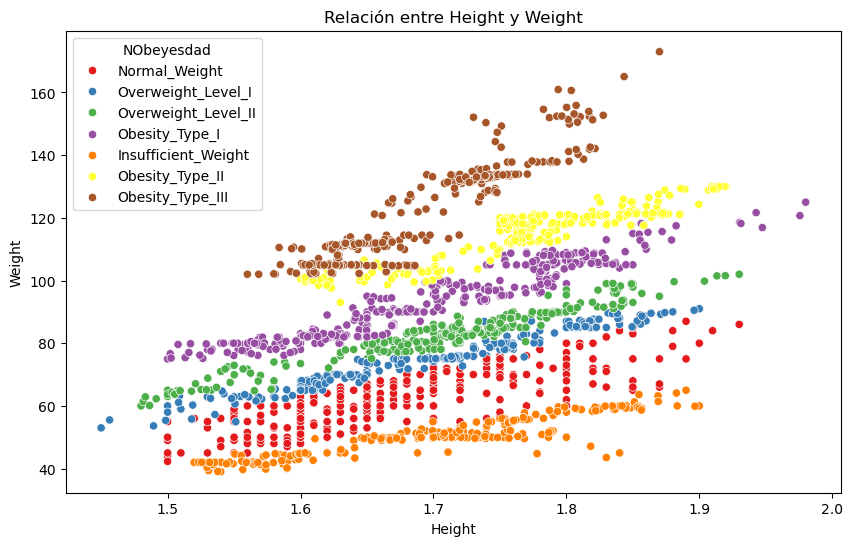

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df, palette='Set1')
plt.title('Relación entre Height y Weight')
plt.show()


En general, la relación entre la altura y el peso de los individuos es aproximadamente lineal. Esto significa que, a medida que aumenta la estatura de una persona, su peso también tiende a aumentar. Esta relación se debe a que, en promedio, las personas más altas tienen una mayor masa corporal, lo que implica un peso más alto.

En este gráfico también se aprecia como si alguien tiene una altura en específico pero su peso sobrepasa el rango de lo considerado "saludable" es marcado como otra categoría y viceversa si es que no cumple con el pero indicado de una persona saludable.

#### <font color= #96d9cf>**Codificación de variables categóricas [sin usar One-hot u Ordinal-Encoder]**</font>

Si bien la codificación de variables categóricas se suele hacer después de dividir nuestro conjunto de datos en prueba y entrenamiento, poder ver en nuestro conjunto de datos que hay variables que pueden ser transformadas a algo binario [1==Si, 0==No] como 'family_history_with_overweight', 'FAVC', 'SMOKE', y 'SCC'. Por lo que proseguiremos a hacer eso:

In [82]:
mapeo_binario = {
    'yes': 1,
    'no':0}

# Mapear las clases antes de dividir
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(mapeo_binario)
df['FAVC']=df['FAVC'].map(mapeo_binario)
df['SMOKE']=df['SMOKE'].map(mapeo_binario)
df['SCC']=df['SCC'].map(mapeo_binario)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Como habíamos notado antes, tambíen debemos de asignarle etiquetas numéricas a las diferentes clasificaciones de la variable ['NObeyesdad'], lo haremos de forma jerárquíca:
- 'Insufficient_Weight' → 0
- 'Normal_Weight' → 1
- 'Overweight_Level_I' → 2
- 'Overweight_Level_II' → 3
- 'Obesity_Type_I' → 4
- 'Obesity_Type_II' → 5
- 'Obesity_Type_III' → 6

In [83]:
mapeo_clase = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Mapear las clases antes de dividir
df['NObeyesdad'] = df['NObeyesdad'].map(mapeo_clase)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,2
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,6


#### <font color= #96d9cf>**Dividir el conjunto en datos de entrenamiento y prueba**</font>

Con las variables ya mapeadas, procederemos a dividir nuestro conjunto de datos.

In [84]:
# Separar características y variable target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Dividimos en conjunto de entrenamiento y prueba [con división estratificada]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### <font color= #96d9cf>**Encodear las variables categóricas y realizar un escalamiento de variables**</font>

Antes de empezar a modelar, es necesario transformar las variables categóricas a numéricas

In [85]:
#Separamos las variables numericas de las categoricas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print("Variables numericas:", numeric_features)
print("Variables categoricas:",category_features)

Variables numericas: ['Age' 'Height' 'Weight' 'family_history_with_overweight' 'FAVC' 'FCVC'
 'NCP' 'SMOKE' 'CH2O' 'SCC' 'FAF' 'TUE']
Variables categoricas: ['Gender' 'CAEC' 'CALC' 'MTRANS']


In [86]:
#Se crean dos pipelines: uno para transformar las variables numéricas y otro para las categóricas.

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Se combina ambos transformadores (numérico y categórico) en un solo preprocesador que puede aplicarse a los datos para procesar todas las variables en conjunto.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [87]:
# La libreria de onehot encoder regresa un array, por lo que debemos de convertirlo en dataframe

def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(category_features.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return df

In [88]:
X_train_t = dummify(ohe, X_train, category_features)
X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
442,0.267608,0.215430,-0.819498,0.469612,0.362446,-0.781173,0.408313,-0.145512,-0.014857,-0.221583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253,0.267608,-1.184723,-1.511668,0.469612,0.362446,-0.781173,-2.150047,-0.145512,-0.014857,-0.221583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
554,-1.285160,-0.096836,-1.295197,-2.129419,0.362446,-0.781173,-0.869606,-0.145512,1.090332,-0.221583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1500,0.026979,-0.417041,0.170496,0.469612,0.362446,-1.320627,0.408313,-0.145512,-1.389050,-0.221583,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
359,1.376519,-1.507835,-1.473214,0.469612,-2.759030,-0.781173,0.408313,-0.145512,-0.014857,-0.221583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### <font color= #96d9cf>**Selección de Variables**</font>

Para la selección de variables se decidieron usar los **métodos de Filtrado** ya que hacen un tipo rango de las variables que más afectan a la variable de salida, y en este contexto creemos que ese método de selección es el óptimo. Además de que no tenemos una gran cantidad de instancias por lo que un método **Wrapper** podría llegar a causar un over fitting. Esta selección solo se la aplicaremos a modelos que no sean del tipo de selección embebido, es decir, que el modelo propio haga la seleción.

Debido a que tenemos tanto variables numéricas como categóricas, debemos de aplicar diferentes métodos de filtrado al conjunto de datos: **ANOVA** para datos **numéricos** y **Chi Cuadraddo** para datos que eran originalmente **categóricos**.

##### <font color= #bfe68c>**ANOVA & CHI-SQUARED**</font>

In [30]:
import scipy.stats as stats
from sklearn.feature_selection import chi2

# Aplicar ANOVA primero
variables_significativas_num = []

# Seleccionar solo las variables que eran originalmente numéricas
for variable in numeric_features:
    grupos = []
    
    for valor in y_train.unique():
        grupos.append(X_train_t[y_train == valor][variable])
    
    # Realizar ANOVA
    F, p = stats.f_oneway(*grupos)
    
    # Evaluar si el p-value es menor que 0.05
    if p < 0.05:
        variables_significativas_num.append(variable)  # Agregar a las variables significativas

# Aplicar chi-cuadrado a variables que eran originalmente categóricas
categoric_feature_onehot = [col for col in X_train_t.columns if col not in numeric_features]

# Calcular el estadístico Chi-cuadrado
chi2_values, p_values = chi2(X_train_t[categoric_feature_onehot], y_train)

variables_significativas_cat = [feature for feature, p_value in zip(categoric_feature_onehot, p_values) if p_value < 0.05]

# Juntar los dos resultados de la selección
seleccion_var = variables_significativas_num + variables_significativas_cat

# Hacer un filtrado
X_train_t_sel = X_train_t[seleccion_var]
X_test_t_sel= X_test_t[seleccion_var]

In [11]:
print(f'Variables seleccionadas: {seleccion_var}')
print(f'Variables eliminadas {list(set(X_train_t.columns) - set(seleccion_var))}')

Variables seleccionadas: ['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']
Variables eliminadas ['CALC_Always', 'MTRANS_Motorbike']


In [30]:
X_train_t_sel.shape

(1688, 25)

Esta selección de variables indica que los individuos que utilizan la motocicleta como medio de transporte y aquellos que consumen alcohol con mucha frecuencia no presentan información relevante para predecir ['NObeyesdad']

### <font color= #96d9cf>**Comparar Modelos**</font>

Una vez hecho el pre-procesamiento es tiempo del modelado, para este proyecto se pobaran 4 distintos modelos [SVC, RANDOM FOREST, XGBOOST, REDES NEURONALES]. Entre estos 4 modelos consideramos que el modelo que dará mejores resultados es SVC debido a lo siguiente:
- No tenemos un gran conjunto de datos por lo que el costo computacional no será muy alto.
- No hay un desbalanceo de clases por lo que el modelo podrá hacer buenas redicciones.
- Tenemos una "pequeña" cantidad de datos, por lo que los modelos robustos podrían llegar a sobre-ajustarse.
- Como son afectados sólo por los puntos cerca del margen, funcionan muy bien con datos que tienen alta dimensionalidad
- Tenemos datos categóricos de alta cardinalidad por lo que SVC es un modelo al que no le afecta esto.
- No tenemos muchos outliers, por lo que SVC debería de ajustarse bastante bien a los datos y no ser tan sensible.

Para comparar modelos se eligió la métrica de **recall**. Dentro de el contexto de los datos si a una persona que presenta un tipo de obesidad el modelo le da un **True Positive** [Por ejemplo, decirle que si esta en un peso saludable] facilemnte puede ser descartado como algo érroneo y las consecuencias no presentan un costo alto. Sin embargo en caso contrario, si el modelo diera un **True Negative** a una persona que presenta una Obesidad de Tipo 2 indicando que no lo padece, es probable que es apersona deje de tomar sus medicamentos o empiece a "descuidarse" puesto a que el modelo indica que es más saludable, el costo de eso es bastante alto. Por lo cuál buscamos **penalizar estos True Negatives** y Recall es la métrica perfecta para la tarea.

Además de eso se hará un reporte de Clasificación para poder ver la eficiencia del modelo en general, pero el tueno de hiperparámetros se hará con **recall**.

##### <font color= #bfe68c>**SVC**</font>

Se probará hacer una máquina de vector soporte debido a que es un modelo muy compacto además de que tenemos un número de instancias relativamente bajo, por lo que no será costoso el entrenamiento del modelo. Además de su versátilidad y los diferentes trucos de kernel.

##### <font color= #bfe68c>**SVC-Tuneo de Hiperparámetros**</font>

Debido a que tenemos "pocos" datos el tema de overfitting es importante, por lo que antes de hacer un cross-validation para evaluar la precisión del modelo, debemos asegurarnos de que los hiperparámetros que indica no se esten sobreajustando a los datos.

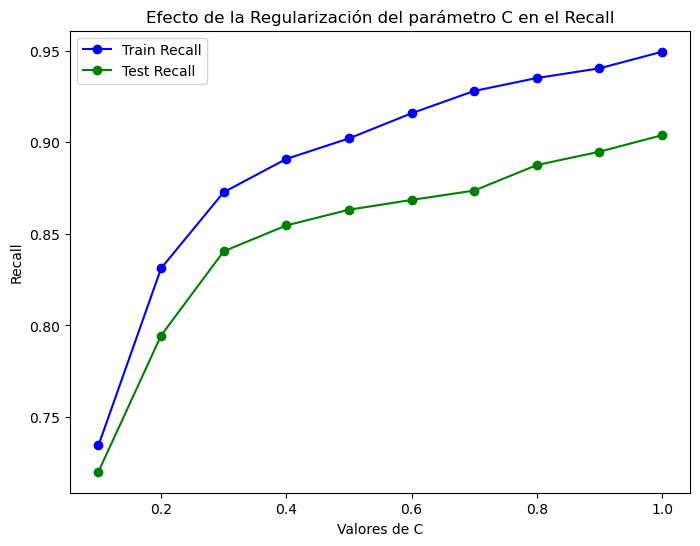

In [35]:
# Graficamos C vs el F1-score
c_values = np.arange(0.1, 1.1, 0.1)
train_scores = []
test_scores = []

for c in c_values:
    SVC_model = svm.SVC(kernel='rbf', C=c, random_state=42)
    SVC_model.fit(X_train_t_sel, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = SVC_model.predict(X_train_t_sel)
    test_preds = SVC_model.predict(X_test_t_sel)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(c_values, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('Valores de C')
plt.ylabel('Recall')
plt.title('Efecto de la Regularización del parámetro C en el Recall')
plt.legend()
plt.show()


Para el hiperparámetro C los valores que el modelo debería de tomar para no causar overfitting serían **[0.5, 0.55, 0.6, 0.65]**

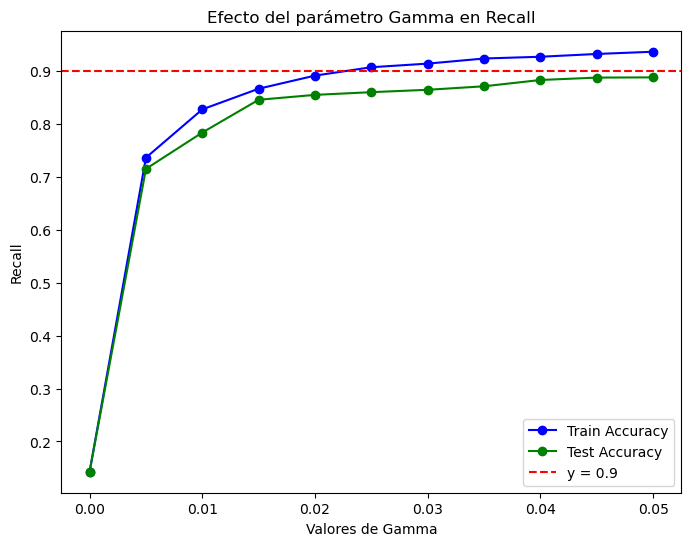

In [36]:
#graficamos gamma vs el recall
g_values = np.arange(0, 0.051, 0.005) # Paso ajustado a 0.05
train_scores = []
test_scores = []

for g in g_values:
    SVC_model = svm.SVC(kernel='rbf', gamma=g, random_state=42)
    SVC_model.fit(X_train_t_sel, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = SVC_model.predict(X_train_t_sel)
    test_preds = SVC_model.predict(X_test_t_sel)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(g_values, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(g_values, test_scores, label='Test Accuracy', color='green', marker='o')

# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.9, color='red', linestyle='--', label='y = 0.9')

plt.xlabel('Valores de Gamma')
plt.ylabel('Recall')
plt.title('Efecto del parámetro Gamma en Recall')
plt.legend()
plt.show()

Para el hiperparámetro gamma los valores que el modelo debería de tomar para no causar overfitting serían **[0.02, 0.025, 0.03, 0.035, 0.04, 0.045]**

Una vez encontrado los hiperparámetros que hacen que el modelo tenga buenos scores pero que no causan overfitting, usamos cross-validation para encontrar la combinación que da el mejor resultado.

In [68]:
# Definir el modelo SVC
SVC_model = svm.SVC(kernel='rbf', random_state=42)

# Configurar el grid search con la validación cruzada
SVC_gs = GridSearchCV(SVC_model,
                      param_grid={'C': [0.5, 0.55, 0.6, 0.65],  # Parámetros de regularización
                                  'gamma': [0.02, 0.025, 0.03, 0.035, 0.04, 0.045]},  # Parámetros gamma
                      scoring='recall_macro',  # Métrica de evaluación
                      verbose=0)

# Entrenar el modelo con GridSearchCV
SVC_gs.fit(X_train_t_sel, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", SVC_gs.best_params_)

Mejores parámetros: {'C': 0.65, 'gamma': 0.045}


##### <font color= #bfe68c>**SVC-Modelado**</font>

Utilizamos los parámetros que encontramos previamente para crear nuestro modelo.

In [103]:
#crear modelo usando parámetros óptimos
SVC_model = svm.SVC(kernel='rbf', C=0.65, gamma=0.045, random_state=42)

#Entrenamiento
SVC_model.fit(X_train_t_sel, y_train)

SVC(C=0.65, gamma=0.045, random_state=42)

Creamos un reporte para ver que tan bueno fue el modelo prediciendo datos nuevos.

In [ ]:
# Predicción del modelo
nueva_y = SVC_model.predict(X_test_t_sel)

# Calcular el recall 
print(f"Recall (promedio macro): {recall_score(y_test, nueva_y, average='macro'):.4f}\n")

# Generar el reporte de Clasificación
svc_report = classification_report(y_test, nueva_y, target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(svc_report)

Recall (promedio macro): 0.8661

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        54
      Normal_Weight       0.76      0.78      0.77        58
 Overweight_Level_I       0.78      0.72      0.75        58
Overweight_Level_II       0.79      0.83      0.81        58
     Obesity_Type_I       0.88      0.87      0.88        70
    Obesity_Type_II       0.89      0.95      0.92        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423



El recall score pormedio fue muy bueno en general, se puede apreciar en el reporte como las categorías de **'Normal-Weight'**, **'Overweight_level_i'** & **'Overweight_level_ii'** fueron las clases que le costaron predecir al modelo, esto puede deberse a que son las clases minoritarias y aunque exista un desbalanceo de clases mínimo, las SVM's son modelos muy sensibles a este desbalance, es probable que esto fuera que el modelo no tuviera esta agilidad de poder predecir esas clases con la misma facilidad que las demás, sin embargo, sigue haciendo un muy buen trabajo y los scores de esas categorías son bastante aceptables.

##### <font color= #bfe68c>**Random Forest**</font>

Se probará hacer un Random Forest ya que es bueno generalizando y más que nada por que funciona muy bien con variables continuas y categóricas que en nuestro caso, hay una mezcla de estas dos últimas

##### <font color= #bfe68c>**RF-Tuneo de Hiperparámetros**</font>

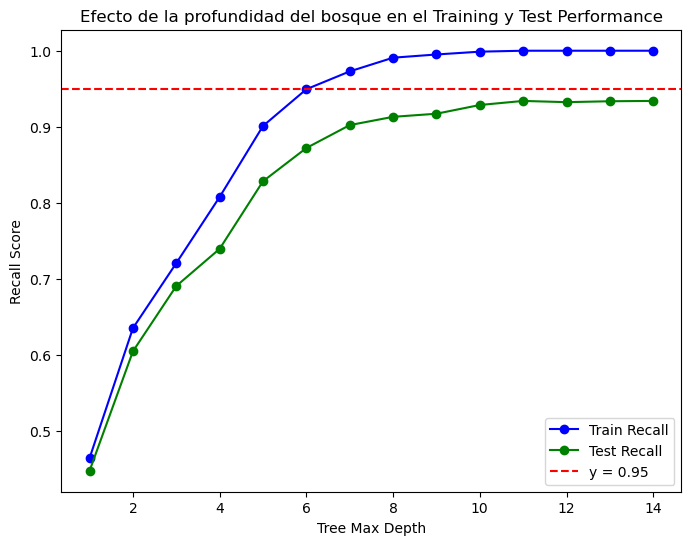

In [ ]:
#graficamos la profundidad vs el Recall
max_depths = range(1, 15)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_clas = RandomForestClassifier(max_depth=max_depth, random_state=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.95 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

Los valores que puede tomar max_depth son [5,6,7]

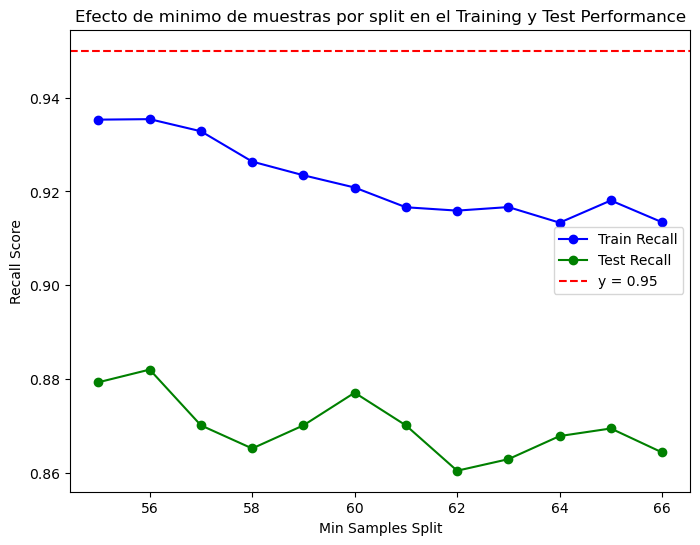

In [ ]:
#graficamos min samples split vs el Recall
min_samples_splits = range(55,67)
train_scores = []
test_scores = []

for min_sam in min_samples_splits:
    tree_clas = RandomForestClassifier(min_samples_split=min_sam, random_state=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto de minimo de muestras por split en el Training y Test Performance')
plt.legend()
plt.show()

El número de observaciones minimas por split debe tomar los valores [60, 61, 62, 63, 64, 65]

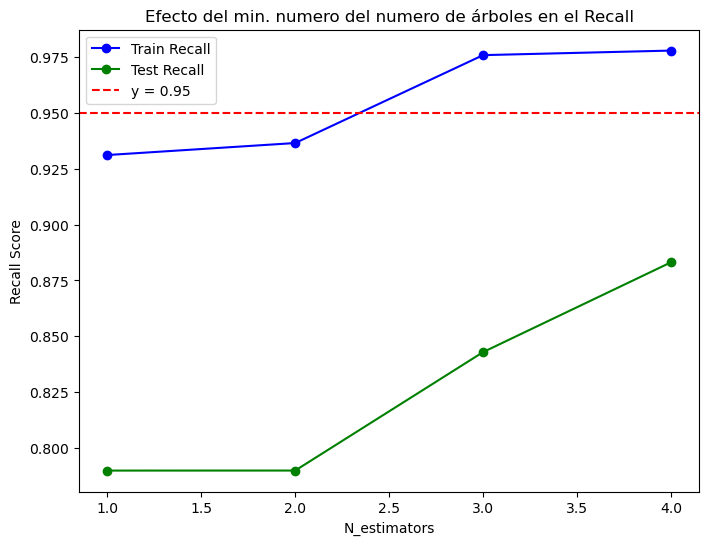

In [61]:
#graficamos el n_estimators vs el accuracy
n_estimators = range(1,5)
train_scores = []
test_scores = []

for estimator in n_estimators:
    tree_clas = RandomForestClassifier(n_estimators=estimator, random_state=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(n_estimators, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('N_estimators')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto del min. numero del numero de árboles en el Recall')
plt.legend()
plt.show()

El número mínimo de árboles debe de ser [1, 2]

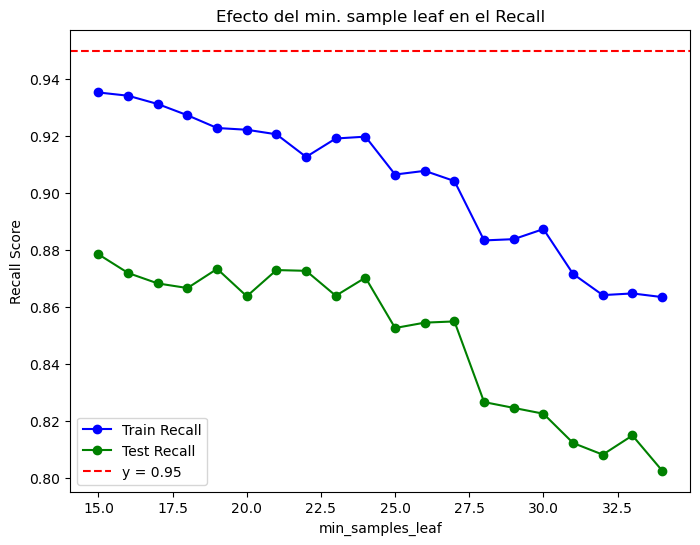

In [64]:
#graficamos el min samples leaf vs el recall
min_samples_leaf = range(15,35)
train_scores = []
test_scores = []

for min_sam in min_samples_leaf:
    tree_clas = RandomForestClassifier(min_samples_leaf=min_sam, random_state=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall [Usando el dataset con la selección de variables]
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaf, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(min_samples_leaf, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto del min. sample leaf en el Recall')
plt.legend()
plt.show()

El minimo de muestras por hoja debe tomar valores dentro de estos: [15, 16, 17, 18, 19, 20, 21, 22]

Una vez encontrado los hiperparámetros que hacen que el modelo tenga buenos scores pero que no causan overfitting, usamos cross-validation para encontrar la combinación que da el mejor resultado.

In [19]:
# Definir el modelo RF
RF_model = RandomForestClassifier(criterion='gini',
                               bootstrap=True,
                               oob_score=False,
                               random_state=42,
                               verbose=0)

RF_gs = GridSearchCV(RF_model,
                  param_grid = {'max_depth': [5,6,7,8], #profundidad máxima
                                'min_samples_split': [60, 61, 62, 63, 64, 65], #minimo numero de observaciones por split
                                'n_estimators': range(1,3), # número de árboles en el bosque
                                'min_samples_leaf': [15, 16, 17, 18, 19, 20, 21, 22]},
                  scoring='recall_macro',
                  verbose=0)
#Entrenamiento
RF_gs.fit(X_train_t, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", RF_gs.best_params_)

Mejores parámetros: {'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 60, 'n_estimators': 2}


##### <font color= #bfe68c>**RF-Modelado**</font>

Ya que obtuvimos los mejores hiperparámetros, hay que crear nuestro modelo:

In [ ]:
#crear modelo usando parámetros óptimos
RF_model = RandomForestClassifier(criterion='gini',
                               bootstrap=True,
                               oob_score=False,
                               random_state=42,
                               max_depth=8,
                               min_samples_leaf=19,
                               min_samples_split=60,
                               n_estimators=2,
                               verbose=0)

#Entrenamiento
RF_model.fit(X_train_t, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=19, min_samples_split=60,
                       n_estimators=2, random_state=42)

Creando un reporte para ver que tan bueno fue el modelo al predecir nuevos datos:

In [ ]:
# Predicción del modelo
nueva_y = RF_model.predict(X_test_t)

# Calcular el recall 
print(f"Recall (promedio macro): {recall_score(y_test, nueva_y, average='macro'):.4f}\n")

# Generar el reporte de Clasificación
rf_report = classification_report(y_test, nueva_y, target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(rf_report)

Recall (promedio macro): 0.7300

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.83      0.83        54
      Normal_Weight       0.65      0.64      0.64        58
 Overweight_Level_I       0.56      0.57      0.56        58
Overweight_Level_II       0.56      0.48      0.52        58
     Obesity_Type_I       0.72      0.69      0.70        70
    Obesity_Type_II       0.81      0.92      0.86        60
   Obesity_Type_III       0.94      0.98      0.96        65

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.73       423
       weighted avg       0.73      0.73      0.73       423



Al igual que en SVC, clases como **'Overweight_level_i'** & **'Overweight_level_ii'** tienen un recall score muy bajo, esto puede debersa a que las características que separan a estas clases tienen diferencias muy sútiles y no tan marcadas como las demás clases por lo que el modelo puede que que no pueda predecir bien la clase y por ende, resulte en un falso negativo alto. Sin embargo un score de 0.73 en promedio no es algo malo, puede considerarse como un modelo regular.

##### <font color= #bfe68c>**XGBoost**</font>

Se probará un XGBoost debido a que es rápido de ejecutar y muy preciso, por lo mismo que todos los modelos basados en árboles son buenos en datasets con alta multidimensionalidad también ayudará a que el modelo sea exitoso.

##### <font color= #bfe68c>**XGB-Tuneo de Hiperparámetros**</font>

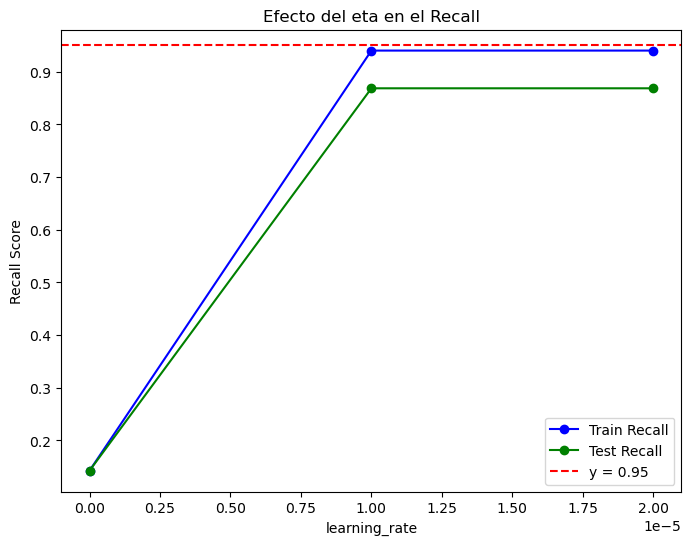

In [ ]:
#graficamos el eta vs el recall
learning_rate = np.arange(0,0.000026,0.00001)
train_scores = []
test_scores = []

for eta in learning_rate:
    tree_clas = xgb.XGBClassifier(objective='multi:softmax',num_class=7,learning_rate=eta,seed=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall 
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(learning_rate, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(learning_rate, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('learning_rate')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto del eta en el Recall')
plt.legend()
plt.show()

Aunque parezca que el valor de 0.0001 es la única opción , podemos agarrar valores cercanos a este, de este modo: [0.000008,0.000009,0.00001]

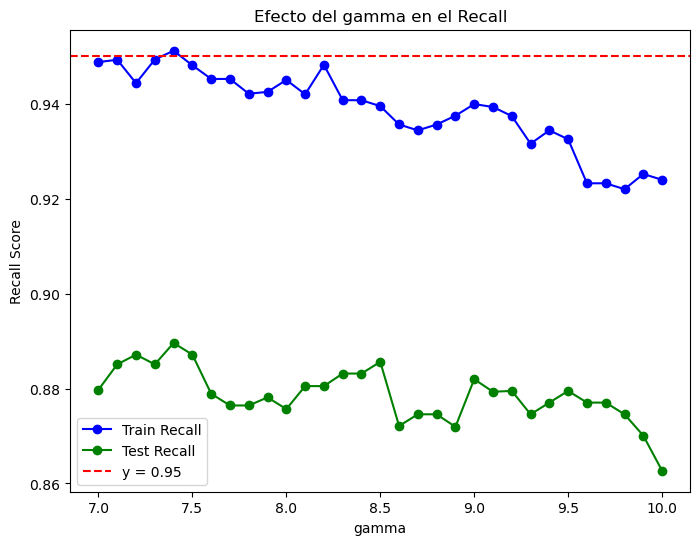

In [33]:
#graficamos el gamma vs el recall
gamma = np.arange(7,10.1,0.1)
train_scores = []
test_scores = []

for g in gamma:
    tree_clas = xgb.XGBClassifier(objective='multi:softmax',num_class=7,gamma=g,seed=42)
    tree_clas.fit(X_train_t, y_train)
    
    # Predecir las clases para calcular recall 
    train_preds = tree_clas.predict(X_train_t)
    test_preds = tree_clas.predict(X_test_t)
    
    # Calcular el recall usando el promedio macro ya que tenemos clases balanceadas
    train_scores.append(recall_score(y_train, train_preds, average='macro'))
    test_scores.append(recall_score(y_test, test_preds, average='macro'))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(gamma, train_scores, label='Train Recall', color='blue', marker='o')
plt.plot(gamma, test_scores, label='Test Recall', color='green', marker='o')
plt.xlabel('gamma')
plt.ylabel('Recall Score')
# Añadir una línea horizontal en y=0.9 para poder separar los valores de gamma
plt.axhline(y=0.95, color='red', linestyle='--', label='y = 0.95')
plt.title('Efecto del gamma en el Recall')
plt.legend()
plt.show()

Tomamos los valores donde tanto el test como el train tienen picos, gamma puede obtener estos valores: 7.2,7.4,7.5,8.5

Una vez encontrado los hiperparámetros que hacen que el modelo tenga buenos scores pero que no causan overfitting, usamos cross-validation para encontrar la combinación que da el mejor resultado.

In [ ]:
#Usando cross validation y grid search
Xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, seed=42)

Xgb_gs = GridSearchCV(Xgb_model,
                  param_grid = {
                    'gamma': [7.2,7.4,7.5,8.5], 
                    'learning_rate': [0.000008,0.000009,0.00001]},     
                  cv=5,
                  scoring='recall_macro')
#Entrenamiento
Xgb_gs.fit(X_train_t, y_train.values.ravel())

#Imprimir parámetros óptimos
print(Xgb_gs.best_params_)

{'gamma': 8.5, 'learning_rate': 8e-06}


##### <font color= #bfe68c>**XGB-Modelado**</font>

Ya que obtuvimos los mejores hiperparámetros, hay que crear nuestro modelo:

In [ ]:
#crear modelo usando parámetros óptimos
Xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                                 seed=42,
                                 gamma=8.5, 
                                 learning_rate=8e-06,
                                 num_class=7)

#Entrenamiento
Xgb_model.fit(X_train_t, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=8e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

Creando un reporte para ver que tan bueno fue el modelo en general:

In [ ]:
# Predicción del modelo
nueva_y = Xgb_model.predict(X_test_t)

# Calcular el recall 
print(f"Recall (promedio macro): {recall_score(y_test, nueva_y, average='macro'):.4f}\n")

# Generar el reporte de Clasificación
xgb_report = classification_report(y_test, nueva_y, target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(xgb_report)

Recall (promedio macro): 0.8533

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.91      0.92        54
      Normal_Weight       0.77      0.76      0.77        58
 Overweight_Level_I       0.72      0.76      0.74        58
Overweight_Level_II       0.77      0.84      0.80        58
     Obesity_Type_I       0.87      0.79      0.83        70
    Obesity_Type_II       0.92      0.93      0.93        60
   Obesity_Type_III       1.00      0.98      0.99        65

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.86      0.85      0.85       423



En el caso de XGBoost sucedió algo interesante, para realizar el tuneo de hiperparámetros se realizaron gráficas como en los 2 modelos previos y en base a su visualización se eligieron el rango de valores para cada parámetro, sin embargo al ejecutarlo daba un score super bajo, aquí la demostración de como fue el primer GridSearch de XGBoost:

In [20]:
#Usando cross validation y grid search
model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, seed=42)

gs = GridSearchCV(model,
                  param_grid = {
                    'gamma': [7.2,7.4,7.5,8.5], 
                    'min_child_weight': range(45, 50),
                    'learning_rate': [0.000008,0.000009,0.00001],
                    'reg_lambda': range(870,876)},     
                  cv=5,
                  scoring='recall_macro')
#Entrenamiento
gs.fit(X_train_t, y_train.values.ravel())

#Imprimir parámetros óptimos
print(gs.best_params_)

{'gamma': 7.2, 'learning_rate': 8e-06, 'min_child_weight': 45, 'reg_lambda': 870}


In [22]:
#crear modelo usando parámetros óptimos
new_model = xgb.XGBClassifier(objective='multi:softmax',
                                 seed=42,
                                 gamma=7.2, 
                                 learning_rate=8e-06,
                                 min_child_weight= 45, 
                                 reg_lambda= 870,
                                 num_class=7)

#Entrenamiento
new_model.fit(X_train_t, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=8e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=45, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
# Predicción del modelo
nueva_y = new_model.predict(X_test_t)

# Calcular el recall 
print(f"Recall (promedio macro): {recall_score(y_test, nueva_y, average='macro'):.4f}\n")

# Generar el reporte de Clasificación
xgb_report_fail = classification_report(y_test, nueva_y, target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(xgb_report_fail)

Recall (promedio macro): 0.5449

                     precision    recall  f1-score   support

Insufficient_Weight       0.58      0.94      0.72        54
      Normal_Weight       0.34      0.38      0.36        58
 Overweight_Level_I       0.00      0.00      0.00        58
Overweight_Level_II       0.00      0.00      0.00        58
     Obesity_Type_I       0.34      0.56      0.42        70
    Obesity_Type_II       0.66      0.93      0.77        60
   Obesity_Type_III       0.90      1.00      0.95        65

           accuracy                           0.55       423
          macro avg       0.40      0.54      0.46       423
       weighted avg       0.41      0.55      0.47       423



c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Como podemos ver, incluso si las gráficas de visualización que hicimos comparando con la métrica que elegimos **[Recall]** apuntaban a que el modelo tendría un buen performance, en realidad causaron lo contrario. Esto nos puede indicar que el tuneo de hiperparametros no siempre garantizará que un modelo sea bueno prediciendo nuevos datos o incluso que elegir los valores que dan los scores más altos en las métricas pueden impactar negativamente al modelo. 
De todo esto nos podemos llevar que en situaciones es mejor realizar un modelo simple y usarlo como nuestra base para mejorar el modelo en caso de que haga falta una mejora en sus parámetros y no solo dejarnos guiar por lo que pensamos que nos "garantizará" un score increíble.

##### <font color= #bfe68c>**Redes Neuronales**</font>

Se utilizará una Red Neuronal debido a su adaptabilidad a los diferentes tipos de datos y su capacidad de manejar patrones complejos, sin embargo debido suelen requerir grandes cantidades de datos y en ese caso no lo tenemos por lo que puede haber un sobreajuste.

##### <font color= #bfe68c>**NN-Tuneo de Hiperparámetros**</font>

En redes neuronales los "hiperparámetros" que hemos visto en clase que se pueden tunear son los **"epochs"** o **épocas** que es el número de iteraciones que realiza una muestra por la red neuronal. También  pueden ser consideradas como parámetros las funciones de avtivación pero suelen ser la misma en las distintas capas y en la capa de salida debemos de utilizar la función **softmax** al tratarse de un problema multiclase.
La cantidad de neuronas por capa se modificará manualmente pero se porbarán valores de 4 a 8 ya que es un problema sencillo de pocas instancias.

##### <font color= #bfe68c>**NN-Modelado**</font>

Para poder trabajar con la red neuronal debemos de transformar nuestra target a algo binario:

In [12]:
dummy_y_train = to_categorical(y_train).astype(int)
dummy_y_test = to_categorical(y_test).astype(int)

El siguiente paso es crear nuestro objeto y darle forma, en nuestro caso optamos por tener 2 capas ocultas con la función de activación **Relu** y con 4 neuronas cada una. En la capa de salida tenemos 7 neuronas [El cuál es el número de clases que existen] y la función de activación es **softmax**.

In [13]:
# Establece la semilla para que no haya cambios cada vez que se ejecute
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#Construcción de la red neuronal
NN_model = Sequential()
NN_model.add(Dense(4, activation='relu', input_shape=(27,))) # Capa de función Relu con 4 neuronas
NN_model.add(Dense(4, activation='relu')) # Capa con función Relu de 4 neuronas
NN_model.add(Dense(7, activation='softmax'))# Capa de salida con función softmax para 7 clases

#Compilar el modelo
NN_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=[Recall()])

#Entrenar el modelo
history = NN_model.fit(X_train_t, dummy_y_train, 
                   epochs=33, 
                   validation_data=(X_test_t,dummy_y_test), verbose=0)

c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


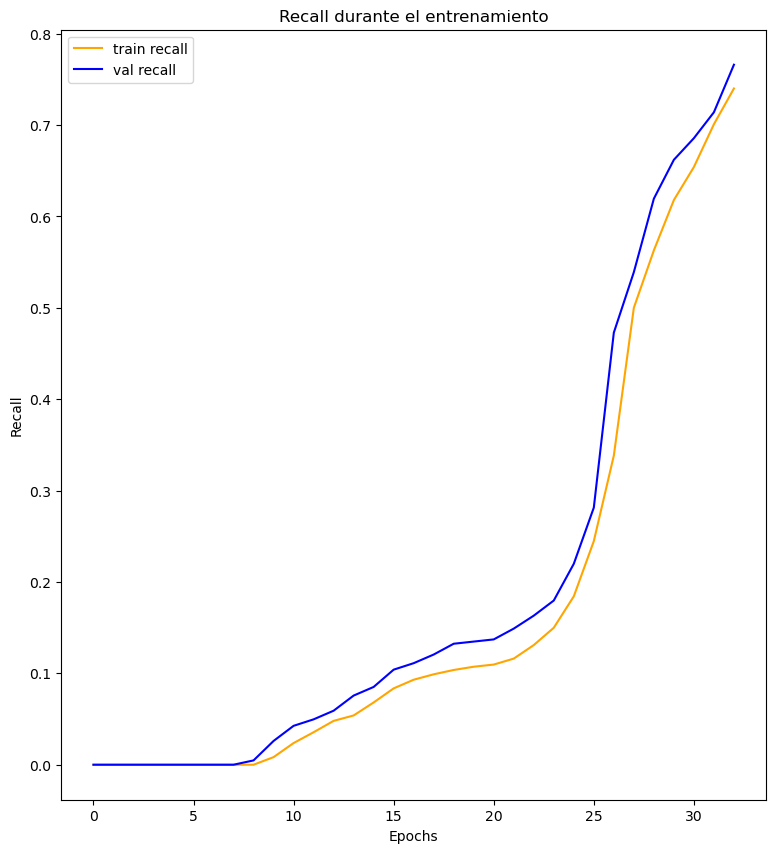

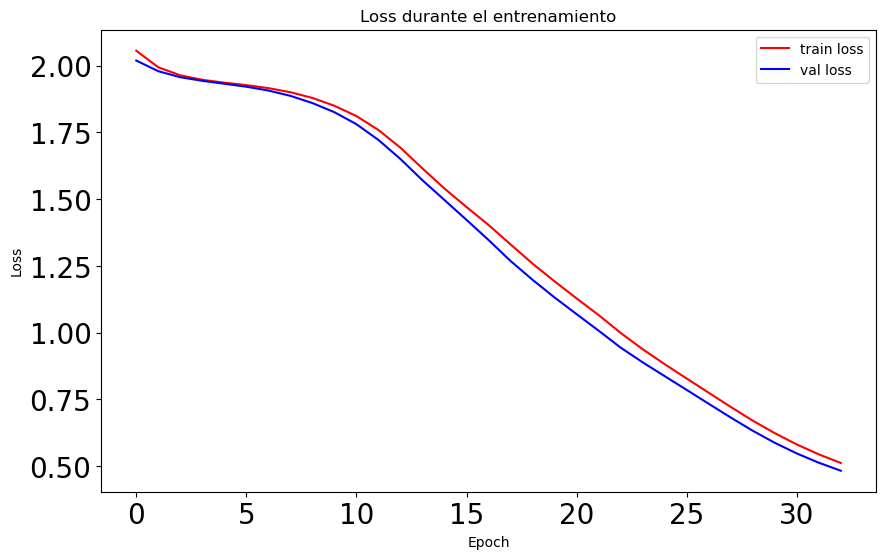

In [14]:
#Ver el performance del modelo en el entrenamiento (recall)
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(history.history[list(history.history.keys())[1]], label='train recall', color='orange')
plt.plot(history.history[list(history.history.keys())[3]], label='val recall', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall durante el entrenamiento')
plt.legend()

# Graficar el categorical crossentropy (loss o función de pérdida)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history.history['loss'], 'r', label='train loss')
ax.plot(history.history['val_loss'], 'b', label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.tick_params(labelsize=20)
plt.title('Loss durante el entrenamiento')

plt.show()

Crear un reporte para visualizar que tan bueno es realizando predicciones:

In [15]:
# Generar predicciones en el conjunto de prueba
y_pred_probs = NN_model.predict(X_test_t)  # en términos de probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)  # en términos de 1 y 0
y_real = np.argmax(dummy_y_test, axis=1)  # Convertir los dummies reales a etiquetas de clase

# Calcular el recall promedio
average_recall = recall_score(y_real, y_pred, average='macro')
print(f'Recall promedio (macro): {average_recall:.4f}')

# Generar el reporte de clasificación
NN_report = classification_report(y_real, y_pred,target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(NN_report)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Recall promedio (macro): 0.9033
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.96      0.91        54
      Normal_Weight       0.81      0.74      0.77        58
 Overweight_Level_I       0.81      0.76      0.79        58
Overweight_Level_II       0.86      0.95      0.90        58
     Obesity_Type_I       1.00      0.93      0.96        70
    Obesity_Type_II       0.97      0.98      0.98        60
   Obesity_Type_III       0.98      1.00      0.99        65

           accuracy                           0.91       423
          macro avg       0.90      0.90      0.90       423
       weighted avg       0.91      0.91      0.90       423



Como se puede ver, de todos los modelos el que mejor es prediciendo los datos son las Redes Neuronales y esto puede deberse a varias cosas: Las Redes Neuronales son buenas tratando relaciones no lineales y con datos con alta dimensionalidad, en nuestro caso gracias a que la mayoria de nuestras variables eran categóricas, la dimensionalidad podría ser uno de los facotres que hacen que modelos como RF o XGB no sean los mejores predictores basándose en nuestros datos, además de que las Redes Neuronales ofrecen un modelo con bastante personalización para irlo ajustando a tus necesidades.

### <font color= #96d9cf>**Crear un conjunto de datos nuevos y predecir sus clases**</font>

Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 
- El mejor modelo que obtuvimos fue el de Redes Neuronales debido a su capacidad de tratar relaciones entre variales complejas y también su habilidad de trabajar con la multidimensionalidad de nuestros datos.

Para crear este nuevo conjunto de datos utilizaremos la herramienta de SMOTE para crear datos sintéticos debido a una serie de cosas:
1. Los datos que se utilizaron para crear el modelo eran todos los datos disponibles, es decir, no tomamos una muestra de una gran base de datos, sino que los datos usados son la única base disponible que cumple con estas características y variables.
2. Tenemos variables tanto numéricas originalmente como categóricas que fueron encodeadas utilizando One-Hot por lo que si bien crear muestras a variables que eran originalmente numéricas es algo "fácil" [Se poría añadir ruido y con eso ya serían nuevos datos] al añadir el factor de las variables categóricas la dificultad aumenta.
3. Queremos mantener las relaciones que existían originalmente en nuestro conjunto de datos. [Lineales y no lineales]
4. Es una técnica simple de realizar a comparación de otras herramientas de las cúales el conocimiento que tenemos es muy limitado si es que hay alguno. [Simulaciones de Montecarlo o GAN's]


Primero veamos el número de clases que originalmente teníamos:

In [16]:
y_train.value_counts()

NObeyesdad
4    281
6    259
5    237
3    232
2    232
1    229
0    218
Name: count, dtype: int64

Con esta distribución en cuenta crearemos nuevos datos:

In [146]:
from imblearn.over_sampling import SMOTE

sampling_strategy = {0: 700, 1: 700, 2: 700, 3: 700, 4: 700, 5: 700, 6: 700} # Añadir manualmente cuantas instancias de cada clase queremos crear

# Crear el objeto de SMOTE con las características que nosotros solicitamos
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Generar el nuevo conjunto de datos [Utilizando la parte escalada para simplificar el proceso de predicciones del modelo]
X_nueva, y_nueva = smote.fit_resample(X_train_t, y_train)

Ya tenemos generadas muestras sintéticas de nuestrso datos, sin embargo la herramienta de SMOTE nos regresa un df con esas nuevas muestras pero también con nuestro conjunto original de datos, por lo que para realemnte tener estos "nuevos" datos, debemos separarlos:

In [147]:
# Identificar cuántas muestras originales había
num_originals = X_train_t.shape[0]

# Filtrar los datos generados con SMOTE para quedarnos solo con los datos nuevos
X_nueva = X_nueva[num_originals:]  # Solo quedan los datos que fueron generados por SMOTE
y_nueva = y_nueva[num_originals:]  

Como son datos de la "vida real", los datos no siempre son idénticos y a veces puede que tengan ruido por lo que intentaremos replicar ese ruido en las 

In [152]:
noise_factor = 0.09  # Tamaño del ruido
noise = np.random.normal(0, noise_factor, X_nueva[numeric_features].shape)  # Ruido para columnas numéricas
X_nueva[numeric_features] = X_nueva[numeric_features] + noise

Una vez creada las muestras podemos dar un vistazo para comprobar que se hayan creado exitosamente:

In [153]:
X_nueva.head() # Nuestro nuevo conjunto de datos para predecir

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1688,-0.357418,-2.054319,-1.719786,-2.258680,-2.832635,1.006505,-2.331524,-0.213813,-1.623369,-0.282386,...,0.0,0.0,0.0,1.00000,0.00000,0.00000,0.0,0.0,1.00000,0.0
1689,-0.388171,0.658215,-1.375991,0.463480,0.486819,-0.020482,1.819535,0.141063,0.147230,-0.311908,...,0.0,0.0,0.0,0.95684,0.04316,0.04316,0.0,0.0,0.95684,0.0
1690,-0.532720,0.664318,-1.101866,0.439459,0.345793,-0.215578,1.730565,-0.242405,0.327488,-0.250057,...,0.0,0.0,0.0,0.00000,1.00000,0.00000,0.0,0.0,1.00000,0.0
1691,-0.253327,-0.094553,-1.157775,0.474388,0.371164,0.698277,0.466631,-0.189142,-0.142477,-0.285494,...,0.0,0.0,0.0,0.00000,1.00000,0.00000,0.0,0.0,1.00000,0.0
1692,0.186085,-0.734059,-1.694745,0.443009,0.325863,0.479193,0.454035,0.031631,0.409211,-0.262700,...,0.0,0.0,0.0,0.00000,1.00000,0.00000,0.0,0.0,1.00000,0.0


In [150]:
y_nueva.value_counts()

NObeyesdad
0    482
1    471
2    468
3    468
5    463
6    441
4    419
Name: count, dtype: int64

Con estos nuevos datos, hay que realizar las predicciones:

In [154]:
# Generar predicciones en el conjunto de prueba
y_pred_probs = NN_model.predict(X_nueva)  # en términos de probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)  # en términos de 1 y 0

# Calcular el recall promedio
average_recall = recall_score(y_pred, y_nueva, average='macro')
print(f'Recall promedio (macro): {average_recall:.4f}')

# Generar el reporte de clasificación
NN_report = classification_report(y_pred, y_nueva,target_names=['Insufficient_Weight', 'Normal_Weight', 
                                                          'Overweight_Level_I', 'Overweight_Level_II', 
                                                          'Obesity_Type_I', 'Obesity_Type_II', 
                                                          'Obesity_Type_III'])
print(NN_report)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Recall promedio (macro): 0.8676
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.87      0.91       541
      Normal_Weight       0.74      0.88      0.80       398
 Overweight_Level_I       0.72      0.77      0.74       438
Overweight_Level_II       0.82      0.76      0.79       510
     Obesity_Type_I       0.87      0.89      0.88       411
    Obesity_Type_II       0.95      0.93      0.94       473
   Obesity_Type_III       0.99      0.99      0.99       441

           accuracy                           0.87      3212
          macro avg       0.87      0.87      0.87      3212
       weighted avg       0.87      0.87      0.87      3212



Como se puede ver, en el caso de las Redes Neuronales bajo un poco el score y esto puede deberse a que hubo un over-fitting en el entrenaimiento lo cuál era algo muy probable a pasar ya que teníamos un conjunto de datos muy pequeño y aunque utilizaramos parámetros que no se ajustaran super bien al modelo, no aplicamos ninguna otra técnica de regularización por lo que es muy probable que la red tenga algo de over-fitting, sin embargo los datos nuevos sintéticos que utilizamos también contienen algo de ruido [para intentar imitar un caso de la vida real]. En general la red neuronal si presenta algo de sobre-ajuste,pero no es tan grave puesto que la precisión con la que realizó estas nuevas predicciones sigue siendo muy buena por lo que si puede llegar a generalizar.

### <font color= #96d9cf>**Conclusiones - Modelos**</font>

En este notebook se realizó la comparación de 4 modelos para predecir, basándose en las características de un individuo, si padecía de algún tipo de obesidad, si estaba sano, o si tenía bajo peso. Después de la realización de estos modelos podemos concluir que cada modelo tiene tanto ventajas como desventajas, en nuestro caso, deducimos que estas fueron las siguientes:

**SVC**
- VENTAJAS
    1. Es un modelo muy compacto que ocupa poca memoria.
    2. Como son afectados sólo por los puntos cerca del margen, funcionan muy bien con datos que tienen alta dimensionalidad, aún cuando hay más dimensiones que observaciones.
    3. Son muy verátiles debido al truco del kernel y puede ayudar a interpretar las relaciones lineales como aquellas un poco más complejas.

- DESVENTAJAS
    1. Los datos no tienen una interpretación probabilística como otros modelos, aunque es posible descifrarla es sumamente costoso si se tienen grandes cantidades de datos.
    2. En nuestro caso, teníamos pocos datos de entrenamiento, sin embargo, en situaciones donde la cantidad de datos es alta, el costo del entrenamiento y del parámetro "C" es muy tardado.

**Random Forest**
- VENTAJAS
    1. Son buenos generalizando por lo que el riesgo de overfitting es menor comparado con otros modelos que no estén basados en árboles.
    2. Funcionan muy bien con variables categóricas y variables continuas.
    3. Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles.
    4. En nuestro caso no había datos nulos ni outliers, pero este modelo es robusto ante la presencia de estos.
- DESVENTAJAS
    1. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos
    2. Requieren más tiempo para la fase de entrenamiento.
    3. En nuestro caso, fue el modelo con el menor rendimiento que si bien aún seguía siendo un buen modelo, comparado con el resto se quedaba atras.

**XGBoost**
- VENTAJAS
    1. Es bueno para manejar datos con alta dimensionalidad [Es decir, muchas variables] como e nuestro caso donde debido a la codificación de variables categóricas, aumentaron de 15 a 27.
    2. Resultados muy precisos.
- DESVENTAJAS
    1. Fue el modelo que más nos costo tunear debido a los hiperparámetros, realizamos el mismo tuneo que con los demás modelos y los resultados que daba eran comparables a tirar una moneda al aire y asi decidir a que clase pertenecían.
    2. Aunque la fase de entrenamiento es rápida, la parte de GridSearch es muy tardada y costosa justamente por todos los hiperpaámetros posibles de tunear. Si utilizas mallas grandes de posibles valores, el tiempo de ejecución puede dar un gran salto de 30 minutos a 2 horas.

**Redes Neuronales**
- VENTAJAS
    1. Pueden aprender patrones no lineales y complejos de los datos.
    2. Puedes trabajar con todo tipo de datos sin importar si las relaciones son claras o no.
    3. Las redes neuronales bien entrenadas pueden generalizar bastante bien a nuevos datos.
- DESVENTAJAS
    1. Requiere de grandes cantidades de datos para poder realizar un buen modelo, en nuestro caso, debido a la pequeña cantidad de datos, creemos que el modelo se sobre-ajusto debido a que no implementamos otras técnicas de regularización.
    2. Las redes neuronales son modelos "caja negra", lo que significa que es difícil interpretar, en este caso no era necesario interpretar el modelo pero si es uan desventaja comparado con otros modelos, como aquellos basados en árboles.
    3. Las redes neuronales pueden ser sensibles a conjuntos de datos desequilibrados, en nuestro caso el desbalanceo no era significante.
    4. Son muy sensibles al escalamiento de los datos, si tus datos no están escalados el modelo puede tener dificultades para realizar predicciones precisas.

### <font color= #96d9cf>**Conclusiones - Datos**</font>

Realmente desde un inicio se podía apreciar que todas las variables eran importantes para nuestra traget ya que todas afectan de una u otra forma la salud de una persona. Al investigar para poder comprender nuestros datos nos dimos cuenta de varias cosas interesantes a nuestro criterio: El género de un individuo puede afectar el tipo de obesidad que padece debido a la forma en la que nuestros cuerpos almacenan la grasa, el medio de transporte influye en el proceso, ya que las personas que realizan actividad física queman calorías más rápidamente, debido a que su cuerpo necesita más energía para funcionar de manera óptima, las personas que dejan de fumar tienden a aumentar de peso como resultado de este cambio, entre otros factores. Todo esto está respaldado por artículos académicos y se detalla con mayor profundidad en la sección del Análisis Exploratorio de Datos (EDA).